<a href="https://colab.research.google.com/github/EllieCodeCamp/leetcode2020/blob/master/BrainTumor_Detection_Exercise4_Wanqiu_Yang_hyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload and Understand the data

In [1]:
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from random import choices
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout,Input,ZeroPadding2D,Activation
from tensorflow.keras.models import Model,load_model

In [2]:
from google.colab import files
uploaded = files.upload()

Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [3]:
!unzip brain_tumor_dataset.zip

Archive:  brain_tumor_dataset.zip
   creating: brain_tumor_dataset/
  inflating: __MACOSX/._brain_tumor_dataset  
  inflating: brain_tumor_dataset/.DS_Store  
  inflating: __MACOSX/brain_tumor_dataset/._.DS_Store  
   creating: brain_tumor_dataset/no/
  inflating: __MACOSX/brain_tumor_dataset/._no  
   creating: brain_tumor_dataset/yes/
  inflating: __MACOSX/brain_tumor_dataset/._yes  
  inflating: brain_tumor_dataset/no/30 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._30 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._22 no.jpg  
  inflating: brain_tumor_dataset/no/41 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._41 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._14 no.jpg  
  inflating: brain_tumor_dataset/no/no 10.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._no 10.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: __MACOSX/brain_

In [4]:
input_path = '/content/brain_tumor_dataset'

253


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


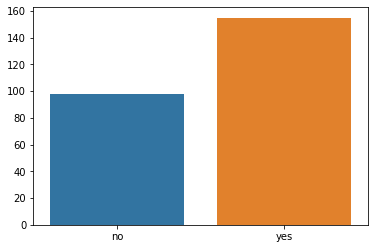

In [5]:
# see how many data from each categories
no=len(os.listdir(input_path+'/no'))
yes=len(os.listdir(input_path+'/yes'))

count=[no,yes]
label=['no','yes']

sns.barplot(label,count)
numTotal = no + yes
print(numTotal)

In [6]:
def show_image(folder):
    path=os.path.join(input_path,folder)
    
    images=choices(os.listdir(path),k=4)
    images=[os.path.join(path,file) for file in images]
    
    return images

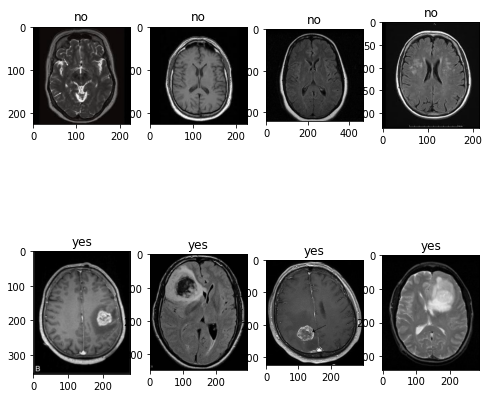

In [7]:
# show 4 sample images from each category
img1=show_image('no')
img2=show_image('yes')
label1=['no']*4
label2=['yes']*4

images=img1+img2
labels=label1+label2

plt.figure(figsize=(8,8))
for i,path_name in enumerate(images):
    plt.subplot(2,4,i+1)
    image=cv.imread(path_name)
    plt.title(labels[i])
    plt.imshow(image)

## Data Split to Train Val and Test

In [8]:
#shuffle the files to divide them into train, test, and the 5 random files for final test
import random
# random number from (0-252)
randomNumbers = random.sample(range(252),5)
print(randomNumbers)

[193, 85, 93, 213, 90]


In [9]:
import shutil
!mkdir /content/test
!mkdir /content/test/yes
!mkdir /content/test/no
!mkdir /content/train
!mkdir /content/train/yes
!mkdir /content/train/no
!mkdir /content/val
!mkdir /content/val/yes
!mkdir /content/val/no


Pick 5 random images for test and move them to another folder

In [10]:
# use this loop to split test
n = 1 # for pick test
path = '/content/brain_tumor_dataset/'
for folder in os.listdir(path):
  if not folder.startswith('.'):
    print(folder)
    size = len(os.listdir(path + folder))
    print(size)
    for (k,file_name) in enumerate(os.listdir(path + folder)):
      img = path + folder + '/' + file_name
      if (n in randomNumbers):
        print(file_name)
        os.rename(img,'/content/test/' + folder + '/' + file_name)
      # k is for split train and validation  
      elif k< 0.9 * size: 
        os.rename(img,'/content/train/' + folder + '/' + file_name)
      else:
        os.rename(img,'/content/val/' + folder + '/' + file_name)
      n = n+1

yes
155
Y251.JPG
Y243.JPG
Y170.JPG
no
98
No16.jpg
no 92.jpg


In [11]:
print(len(os.listdir('/content/train/no')))
print(len(os.listdir('/content/train/yes')))
print(len(os.listdir('/content/val/no')))
print(len(os.listdir('/content/val/yes')))
print(len(os.listdir('/content/test/no')))
print(len(os.listdir('/content/test/yes')))

87
137
9
15
2
3


In [ ]:
# shutil.rmtree('/content/val') 
# shutil.rmtree('/content/test') 
# shutil.rmtree('/content/train') 
# shutil.rmtree('/content/brain_tumor_dataset') 

## Data Augmentation-sample

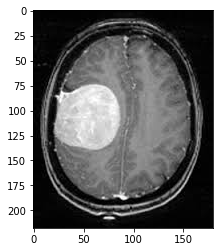

In [12]:
sample_image = cv.imread('/content/train/yes/Y1.jpg')
plt.imshow(sample_image)

In [13]:
# use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [14]:
os.mkdir('preview')
x = cv.imread('/content/train/yes/Y1.jpg')
x = x.reshape((1,) + x.shape) 

i = 0
for batch in train_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

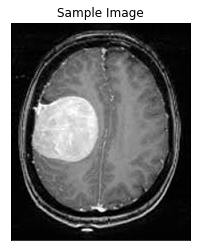

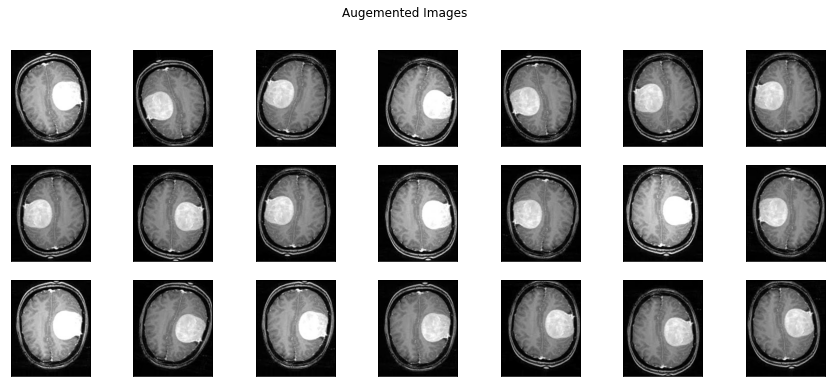

In [15]:
sample = cv.imread('/content/train/yes/Y1.jpg')
plt.imshow(sample)
plt.xticks([])
plt.yticks([])
plt.title('Sample Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv.imread('preview/' + img)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

## Data Augmentation

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)
val_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# only apply the data augmentation on train set
train_gen= train_datagen.flow_from_directory('/content/train',
                                       target_size=(224,224),
                                       class_mode='binary',
                                      )
# for val set and test set, only resize images
val_gen = val_datagen.flow_from_directory( '/content/val',
                                       target_size=(224,224),
                                       class_mode='binary',
                                      )
test_gen = test_datagen.flow_from_directory( '/content/test',
                                       target_size=(224,224),
                                       class_mode='binary',
                                      )

Found 224 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


## Build Model - without hypemarameter

In [17]:
# build modep base on the vgg16
base_model=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)
model_normal = keras.Sequential()
model_normal.add(base_model)
# add more layers
model_normal.add(layers.Flatten())
model_normal.add(Dense(128,activation='relu'))
model_normal.add(Dense(64,activation='relu'))
model_normal.add(layers.Dense(1, activation='sigmoid'))

model_normal.layers[0].trainable = False

model_normal.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model_normal.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 17,934,401
Trainable params: 3,219,713
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
# fit data without callbacks
history = model_normal.fit(train_gen,validation_data=val_gen,epochs=20)

Epoch 1/20
7/7 [==============================] - 13s 670ms/step - loss: 1.3025 - accuracy: 0.5643 - val_loss: 0.5024 - val_accuracy: 0.7917
Epoch 2/20
7/7 [==============================] - 3s 487ms/step - loss: 0.6129 - accuracy: 0.7198 - val_loss: 0.3773 - val_accuracy: 0.8333
Epoch 3/20
7/7 [==============================] - 3s 490ms/step - loss: 0.4873 - accuracy: 0.7686 - val_loss: 0.3226 - val_accuracy: 0.7917
Epoch 4/20
7/7 [==============================] - 3s 482ms/step - loss: 0.3927 - accuracy: 0.8290 - val_loss: 0.4077 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 3s 489ms/step - loss: 0.4438 - accuracy: 0.7981 - val_loss: 0.3475 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 3s 483ms/step - loss: 0.4211 - accuracy: 0.8195 - val_loss: 0.2942 - val_accuracy: 0.8333
Epoch 7/20
7/7 [==============================] - 3s 492ms/step - loss: 0.3130 - accuracy: 0.8491 - val_loss: 0.3681 - val_accuracy: 0.8750
Epoch 8/20
7/7 [===

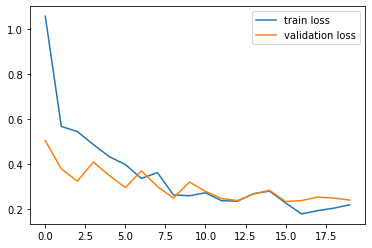

In [20]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')

plt.legend()


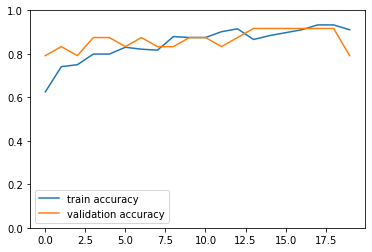

In [41]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.ylim(0, 1)
plt.legend()

Beacause of using the vgg16 as bae model, the performance of the model is already good. However, since we add extra layers to the model, it will be better to optimize model with hyperparameter tuning. 

## Build Model - with hyperparamter and dropout

In [22]:
pip install keras-tuner

     |████████████████████████████████| 71kB 5.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=0b5eaf45107ece624eeb3f4f62d47982c89488c39a672c393494b21c3b858055
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=9e312a97771f1ac6fa0c4f78e195e0837ded4a99746e1d16603df9f357730a65
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [24]:
# use HyperModel
from kerastuner import HyperModel

class HyperModel(HyperModel):
    def __init__(self, input_shape,num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
      
    def build(self, hp):
        base_model=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)
        model_hyper = keras.Sequential()
        model_hyper.add(base_model)
        model_hyper.add(layers.Flatten())
        model_hyper.add(
            Dropout(rate=hp.Float(
                'dropout',
                min_value=0.2,
                max_value=0.5,
                default=0.25,
                step=0.1,
            ))
        )
        model_hyper.add(
            Dense(
                units=hp.Int(
                    'units',
                    min_value=64,
                    max_value=512,
                    step=32,
                    default=256
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'sigmoid'],
                    default='relu'
                )
            )
        )
        model_hyper.add(Dense(64,activation='relu'))
        model_hyper.add(layers.Dense(1, activation='sigmoid'))

        # compile model
        model_hyper.compile(
          loss='binary_crossentropy',
          optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
          metrics=['accuracy']
)
        
        return model_hyper


In [26]:
from kerastuner.tuners import RandomSearch


INPUT_SHAPE = (224,224,3)  
HYPERBAND_MAX_EPOCHS = 20
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

hyper_model = HyperModel(input_shape=INPUT_SHAPE, num_classes=2)

# use random search to select the parameters
hyper_tuner = RandomSearch(
    hyper_model,
    objective='val_accuracy',
    seed=1,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search',
    project_name='brain_tumor_hyper'
)


hyper_tuner.search_space_summary()

Search space summary
Default search space size: 4
dropout (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
units (Int)
{'default': 256, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [28]:

hyper_tuner.search(train_gen, validation_data = val_gen, epochs=20)

Trial 20 Complete [00h 03m 08s]
val_accuracy: 0.8541666567325592

Best val_accuracy So Far: 0.9166666865348816
Total elapsed time: 01h 01m 47s
INFO:tensorflow:Oracle triggered exit


In [29]:
hyper_tuner.results_summary()

# Retrieve the best model.
best_model = hyper_tuner.get_best_models(num_models=1)[0]

Results summary
Results in random_search/brain_tumor_hyper
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout: 0.4000000000000001
units: 320
dense_activation: relu
learning_rate: 0.0001428379365495633
Score: 0.9166666865348816
Trial summary
Hyperparameters:
dropout: 0.4000000000000001
units: 416
dense_activation: sigmoid
learning_rate: 0.00028406107009737317
Score: 0.875
Trial summary
Hyperparameters:
dropout: 0.30000000000000004
units: 384
dense_activation: sigmoid
learning_rate: 0.00016823422054760656
Score: 0.875
Trial summary
Hyperparameters:
dropout: 0.4000000000000001
units: 480
dense_activation: sigmoid
learning_rate: 0.00014023399602325874
Score: 0.875
Trial summary
Hyperparameters:
dropout: 0.30000000000000004
units: 96
dense_activation: relu
learning_rate: 0.0005285006792644589
Score: 0.8541666567325592
Trial summary
Hyperparameters:
dropout: 0.4000000000000001
units: 352
dense_activation: relu
learning_rate: 0.000826

According to the above summary, the best model we got as the val_accuraacy of 0.916, which is good. Eventhough the original model without hyperparameter is the similar accuracy, we stil use the hyper model for test, just it see how it can perform.

In [32]:
# use the model we get to train the data and have the final model
callbacks = [EarlyStopping(patience = 8,monitor='val_accuracy', mode='max')]

history_hyper_best = best_model.fit(train_gen,validation_data=val_gen,epochs=20)

Epoch 1/20
7/7 [==============================] - 5s 638ms/step - loss: 0.4921 - accuracy: 0.7733 - val_loss: 0.4362 - val_accuracy: 0.7500
Epoch 2/20
7/7 [==============================] - 4s 605ms/step - loss: 0.3644 - accuracy: 0.8350 - val_loss: 0.5307 - val_accuracy: 0.5833
Epoch 3/20
7/7 [==============================] - 4s 603ms/step - loss: 0.4637 - accuracy: 0.7995 - val_loss: 0.4294 - val_accuracy: 0.6667
Epoch 4/20
7/7 [==============================] - 4s 601ms/step - loss: 0.5004 - accuracy: 0.7281 - val_loss: 0.3659 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 4s 608ms/step - loss: 0.3857 - accuracy: 0.8415 - val_loss: 0.4442 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 4s 606ms/step - loss: 0.3451 - accuracy: 0.8481 - val_loss: 0.4119 - val_accuracy: 0.8333
Epoch 7/20
7/7 [==============================] - 4s 611ms/step - loss: 0.4177 - accuracy: 0.7985 - val_loss: 0.4927 - val_accuracy: 0.7500
Epoch 8/20
7/7 [====

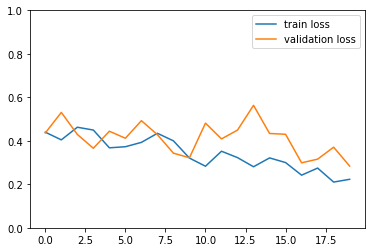

In [35]:
plt.plot(history_hyper_best.history['loss'],label='train loss')
plt.plot(history_hyper_best.history['val_loss'],label='validation loss')
plt.ylim(0,1)
plt.legend()

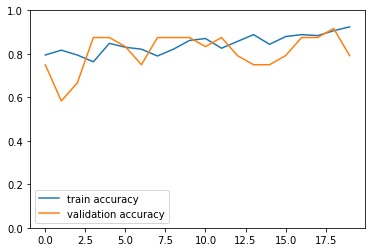

In [36]:
plt.plot(history_hyper_best.history['accuracy'],label='train accuracy')
plt.plot(history_hyper_best.history['val_accuracy'],label='validation accuracy')
plt.ylim(0,1)
plt.legend()

In [37]:

best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 320)               8028480   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                20544     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 22,763,777
Trainable params: 22,763,777
Non-trainable params: 0
____________________________________________

 Compare to th "without-hyper" model, the "hyper model" prevent the overfitting, and was able to stop training early when no more improvment

## Make the prediction on the 5 random tests

In [38]:
test_gen.filenames


['no/No16.jpg', 'no/no 92.jpg', 'yes/Y170.JPG', 'yes/Y243.JPG', 'yes/Y251.JPG']

 test the 5 random images we picked at the very begining
 output explaination:

 e.g.

 1.0 : the *'actual'* category of the image

 [0.99030894]: the *'model prediction value'*

 has tumor: if the above value larger than 0.5, means has tumor, otherwise means no tumor

 images plot


1.0
[0.99030894]
has tumor


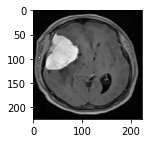

1.0
[0.99996614]
has tumor


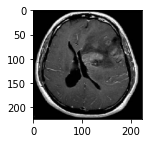

0.0
[0.33458787]
no tumor


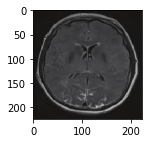

0.0
[3.0852398e-06]
no tumor


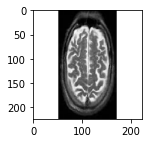

1.0
[0.9514338]
has tumor


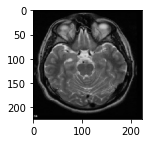

In [39]:
# test the 5 random images we picked at the very begining

x,y = test_gen.next()
for i in range(0,5):
    image = x[i]
    result = best_model.predict(x)
    print(y[i])
    print(result[i])
    if(result[i] > 0.5): print('has tumor')
    if(result[i] < 0.5): print('no tumor')
    plt.figure(figsize = (2,2))
    plt.imshow(image)
    plt.show()


In [40]:
loss, accuracy  = best_model.evaluate(test_gen)


1/1 [==============================] - 0s 80ms/step - loss: 0.0934 - accuracy: 1.0000


### Yeah! 5/5 Correct

## References

Fatmagler. “Brain MRI Images for Brain Tumor.” Kaggle, Kaggle, 20 Feb. 2021, www.kaggle.com/fatmagler/brain-mri-images-for-brain-tumor. 

Macht, Michael. “90%_accuracy_VGG16_brain_tumor_diagnosis.” Kaggle, Kaggle, 14 Feb. 2021, www.kaggle.com/michaelcripman/90-accuracy-vgg16-brain-tumor-diagnosis. 

Ali Khan, Hassan, et al. “Brain Tumor Classification in MRI Image Using Convolutional Neural Network.” Mathematical Biosciences and Engineering, vol. 17, no. 5, 2020, pp. 6203–6216., doi:10.3934/mbe.2020328. 

S. Deepak, P.M. Ameer,
Brain tumor classification using deep CNN features via transfer learning,
Computers in Biology and Medicine,
Volume 111, 2019, 103345, ISSN 0010-4825, https://doi.org/10.1016/j.compbiomed.2019.103345.